In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os

import warnings # supress warnings
warnings.filterwarnings('ignore')
sn.set()

os.listdir('../supervised')
data = pd.read_csv('../supervised/suicide.csv')
data.count()

country                                            13566
iso3c                                              13464
iso2c                                              13413
year                                               13566
Intentional homicides (per 100,000 people)          3840
Suicide mortality rate (per 100,000 population)     4620
GDP (current US$)                                  11396
GDP per capita, PPP (current international $)       7238
adminregion                                         6987
incomeLevel                                        13464
dtype: int64

In [130]:
data.isnull().sum()

country                                               0
iso3c                                               102
iso2c                                               153
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64

In [131]:
df = data.copy()
cols=['iso3c','iso2c']
df = df.drop(labels=cols, axis=1)
df.incomeLevel.unique()

array(['Low income', 'Aggregates', 'Upper middle income',
       'Lower middle income', 'High income', nan, 'Not classified'],
      dtype=object)

In [132]:
df['incomeLevel'].replace(['Not classified', 'Low income', 'Lower middle income', 'Upper middle income','High income','Aggregates' ], [0,1,2,3,4,5], inplace=True )
df

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
inthom= data['Intentional homicides (per 100,000 people)'].values.reshape(-1,1)


df['inthom']=imputer.fit_transform(inthom)

df= df.drop(['Intentional homicides (per 100,000 people)'], axis=1)

df= df[['country',
 'year',
 'inthom',
 'Suicide mortality rate (per 100,000 population)',
 'GDP (current US$)',
 'GDP per capita, PPP (current international $)',
 'adminregion',
 'incomeLevel']]


In [139]:
from sklearn.impute import KNNImputer
# suicide= data['Suicide mortality rate (per 100,000 population)'].values.reshape(-1,1)
# imp = SimpleImputer(missing_values=np.nan, strategy="median")
# #imp.fit(df[["Suicide mortality rate (per 100,000 population)"]])
# imp.fit_transform(suicide)
# df

imputer = KNNImputer(n_neighbors=5, weights="uniform")
data['Suicide mortality rate (per 100,000 population)']= data['Suicide mortality rate (per 100,000 population)'].values.reshape(-1,1)
df['Suicide mortality rate (per 100,000 population)']=imputer.fit_transform(data[['Suicide mortality rate (per 100,000 population)']])
df['GDP per capita, PPP (current international $)']=imputer.fit_transform(data[['GDP per capita, PPP (current international $)']])
df


,country,year,inthom,"Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,1970,3.408601,10.545263,1.748887e+09,14326.351258,South Asia,1.0
1,Afghanistan,1971,3.408601,10.545263,1.831109e+09,14326.351258,South Asia,1.0
2,Afghanistan,1972,3.408601,10.545263,1.595555e+09,14326.351258,South Asia,1.0
3,Afghanistan,1973,3.408601,10.545263,1.733333e+09,14326.351258,South Asia,1.0
4,Afghanistan,1974,3.408601,10.545263,2.155555e+09,14326.351258,South Asia,1.0
...,...,...,...,...,...,...,...,...
13561,Zimbabwe,2016,3.408601,16.800000,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),2.0
13562,Zimbabwe,2017,3.408601,15.000000,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),2.0
13563,Zimbabwe,2018,3.408601,14.000000,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),2.0
13564,Zimbabwe,2019,3.408601,14.100000,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),2.0


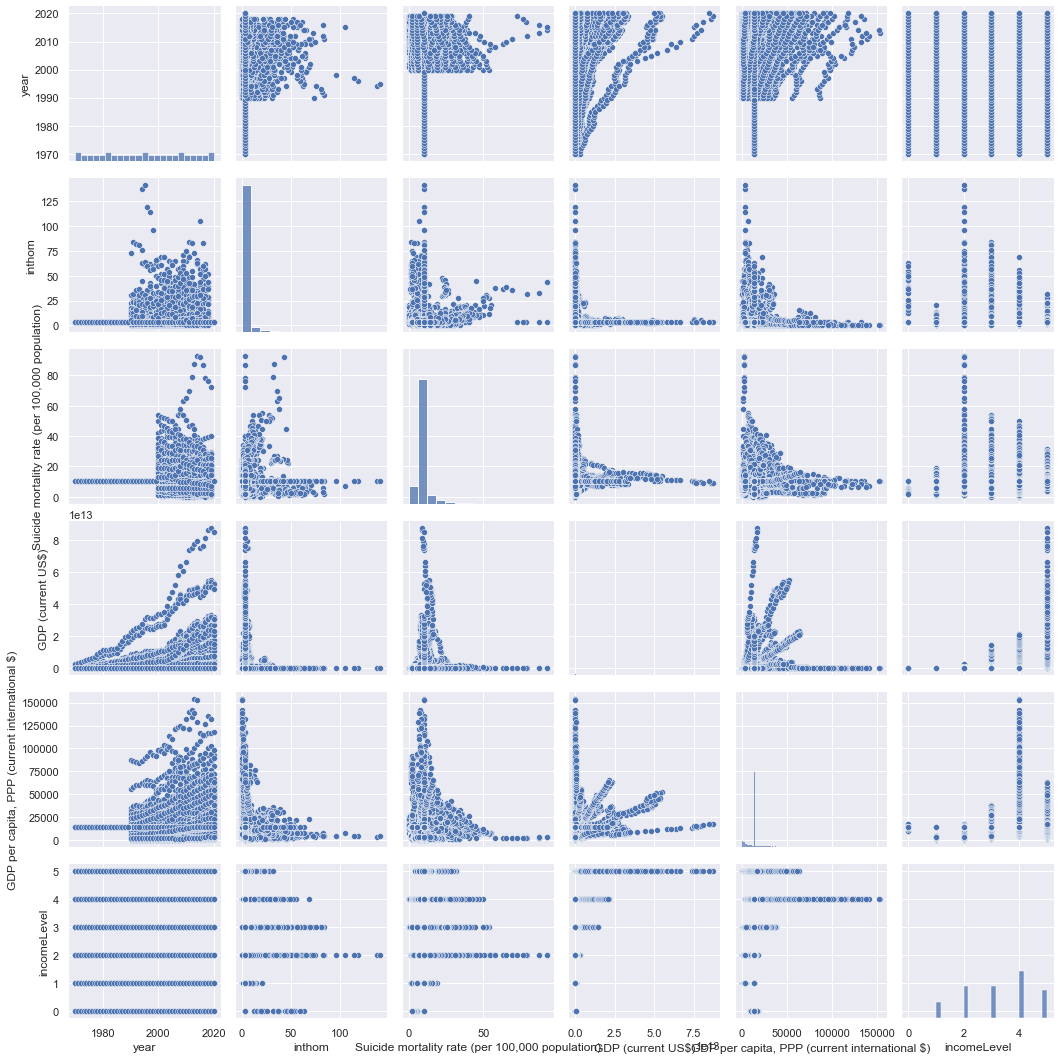

In [140]:
sn.pairplot(df)